In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# bdata = pd.read_csv("raw_house_data.csv", sep = ',', header="infer")
bdata = pd.read_csv("raw_house_data.csv")
bdata.head()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10,10500,0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2,7300,0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3,None,None,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",None
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5,9019,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",None
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6,6396,3,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55


In [3]:
# Data dimensions
bdata.shape

(5000, 16)

In [4]:
bdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         4990 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         5000 non-null   object 
 10  sqrt_ft           5000 non-null   object 
 11  garage            5000 non-null   object 
 12  kitchen_features  5000 non-null   object 
 13  fireplaces        5000 non-null   object 
 14  floor_covering    5000 non-null   object 
 15  HOA               5000 non-null   object 
dtypes: float64(5), int64(4), object(7)
memory 

In [5]:
# Replace the missing value and special characters
bdata1= bdata
bdata = bdata.replace(r'^\s*$',np.nan, regex = True)
bdata = bdata.fillna(0)

In [6]:
# colu = list(bdata.columns)
# bdata = bdata[colu].replace(['None'],0)
# bdata.replace(to_replace=[None], value=np.nan, inplace=True)
# cols = ['sqrt_ft','garage']
# bdata[cols] = bdata[cols].astype('float')

sf_mean = np.mean(bdata.sqrt_ft[bdata['sqrt_ft'] != "None"].to_numpy(dtype=float))
print(sf_mean)
bdata["sqrt_ft"].replace("None",sf_mean, inplace=True)

ga_mean = np.mean(bdata.garage[bdata['garage'] != "None"].to_numpy(dtype=float))
print(ga_mean)
bdata["garage"].replace("None",ga_mean, inplace=True)


3716.3668284789646
2.816142599639495


In [7]:
bdata.describe()

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.00000,5000.000000
mean,2.127070e+07,7.746262e+05,85723.025600,-110.912107,32.308512,4.651994,9.402828e+03,1992.32800,3.933800
std,2.398508e+06,3.185556e+05,38.061712,0.120629,0.178028,51.633929,1.729385e+05,65.48614,1.245362
min,3.042851e+06,1.690000e+05,85118.000000,-112.520168,31.356362,0.000000,0.000000e+00,0.00000,1.000000
25%,2.140718e+07,5.850000e+05,85718.000000,-110.979260,32.277484,0.580000,4.803605e+03,1987.00000,3.000000
50%,2.161469e+07,6.750000e+05,85737.000000,-110.923420,32.318517,0.990000,6.223760e+03,1999.00000,4.000000
75%,2.180480e+07,8.350000e+05,85749.000000,-110.859078,32.394334,1.750000,8.082830e+03,2006.00000,4.000000
max,2.192856e+07,5.300000e+06,86323.000000,-109.454637,34.927884,2154.000000,1.221508e+07,2019.00000,36.000000


In [8]:
# Check any data conatain spurious values or null values
bdata.columns[bdata.isnull().any()]

Index([], dtype='object')

/Users/preethamvignesh/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 576x576 with 0 Axes>

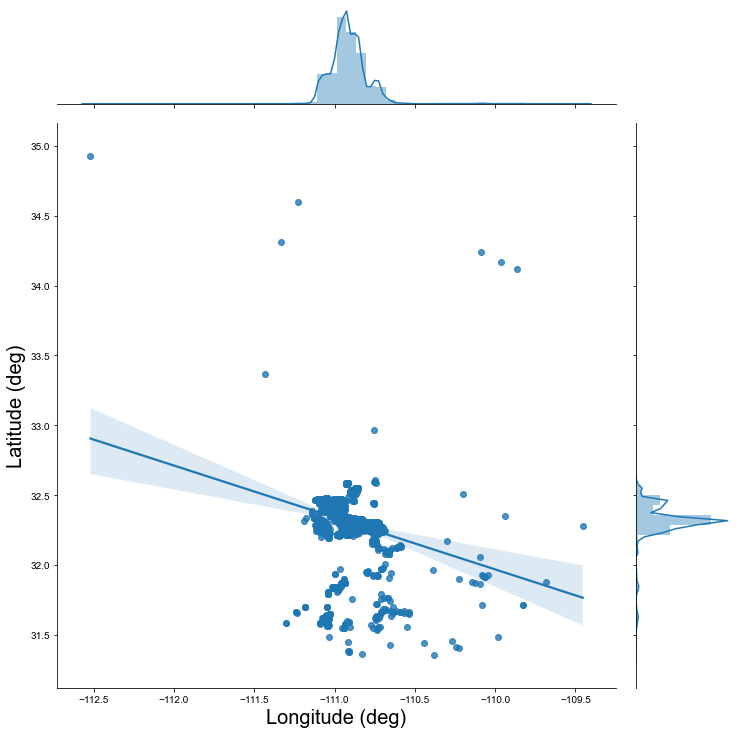

In [9]:
# visualize the location of the houses based on longitude vs latitude
# and we will find out the common location most houses are sold.
plt.figure(figsize=(8,8))
sns.jointplot(x=bdata.longitude.values, y=bdata.latitude.values,size=10, kind="reg")
plt.xlabel('Longitude (deg)', fontsize=20)
plt.ylabel('Latitude (deg)', fontsize=20)
sns.set(font_scale = 1.2)
plt.show()

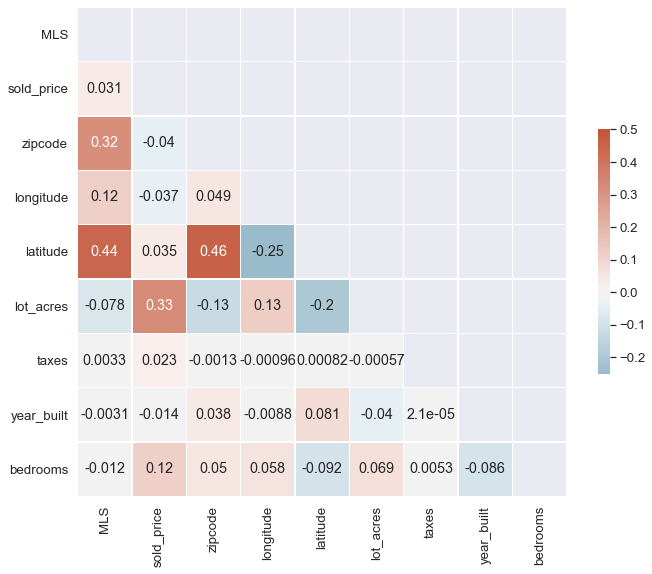

In [10]:
from string import ascii_letters
corr = bdata.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)


Text(0, 0.5, 'count')

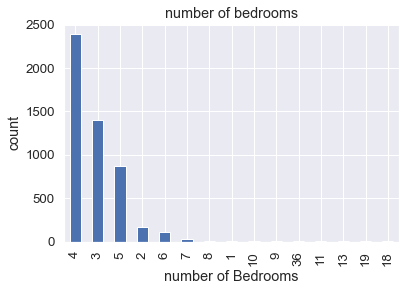

In [11]:
# The bedroom column ranges between 1 to 36, it indicate simple house to
# big bunglow, so we will check the most common bedrooms
# check most common house (bedroom wise)
bdata['bedrooms'].value_counts().plot(kind='bar')
plt.title('number of bedrooms')
plt.xlabel('number of Bedrooms')
plt.ylabel('count')

Text(0, 0.5, 'Sold price')

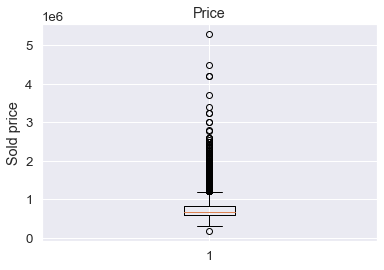

In [12]:
# check the sold price range for each house
plt.boxplot(bdata['sold_price'])
plt.title('Price')
plt.ylabel('Sold price')

10258 None


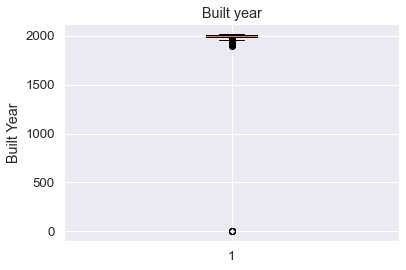

In [13]:
# Check the none values in the dataset
plt.boxplot(bdata['year_built'])
plt.title('Built year')
plt.ylabel('Built Year')
print(min(bdata1.sqrt_ft),max(bdata1.sqrt_ft))

Text(0, 0.5, 'Built Year')

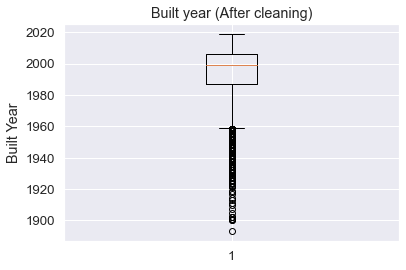

In [14]:
# check and replace none values to median value
med_yr = np.median(bdata['year_built'].to_numpy())
bdata["year_built"].replace(0,med_yr, inplace = True)
plt.boxplot(bdata['year_built'])
plt.title('Built year (After cleaning)')
plt.ylabel('Built Year')

Text(0.5, 1.0, 'Before cleaning')

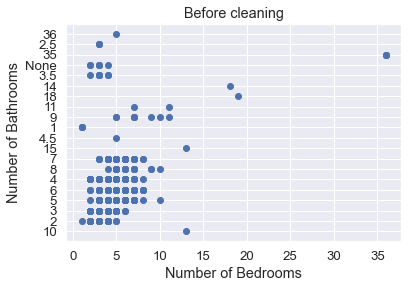

In [15]:
# check the bedrooms and bathrooms data
plt.scatter(bdata1.bedrooms,bdata1.bathrooms)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Number of Bathrooms')
plt.title('Before cleaning')

Text(0.5, 1.0, 'After cleaning')

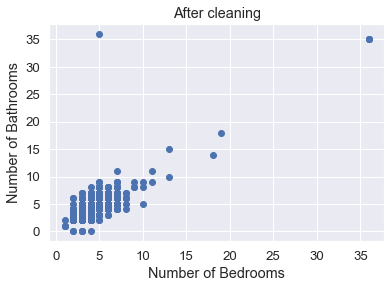

In [16]:
# Cleaning the datasets 
bdata["bathrooms"].replace("None", 0, inplace=True)
# print(bdata.bathrooms)
plt.scatter(bdata["bedrooms"].to_numpy(),bdata['bathrooms'].to_numpy(dtype=float))
plt.xlabel('Number of Bedrooms')
plt.ylabel('Number of Bathrooms')
plt.title('After cleaning')

3716.3668284789637


{'whiskers': [<matplotlib.lines.Line2D at 0x1a1beaf350>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1bb67b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1beaf210>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1bb67a10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1bdf36d0>],
 'means': []}

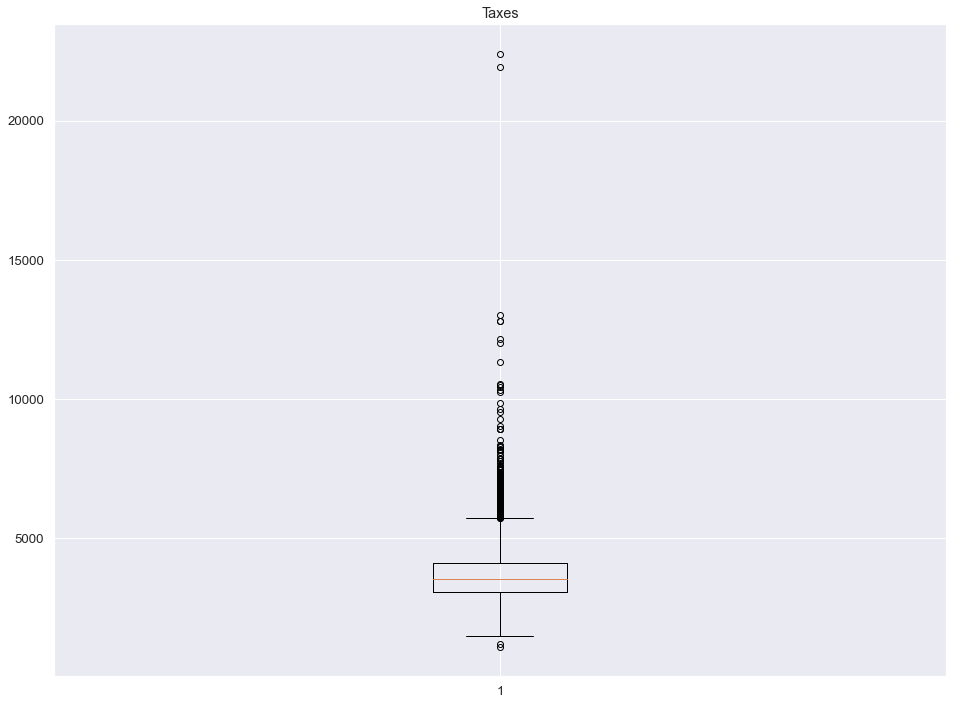

In [17]:
# print(min(bdata.sqrt_ft),max(bdata.sqrt_ft))

sf_mean = np.mean(bdata.sqrt_ft[bdata['sqrt_ft'] != "None"].to_numpy(dtype=float))
print(sf_mean)

bdata["sqrt_ft"].replace("None",sf_mean, inplace=True)
# plt.boxplot(bdata['sqrt_ft'].to_numpy())
# plt.title('sqrt')
fig6 = plt.figure(figsize=(16,12))
ax6 = plt.axes()
ax6.set_title('Taxes')
ax6.boxplot(bdata['sqrt_ft'].to_numpy(dtype=float))

(array([5.740e+02, 2.885e+03, 1.398e+03, 1.500e+01, 1.700e+01, 6.400e+01,
        3.600e+01, 2.000e+00, 6.000e+00, 3.000e+00]),
 array([ 0. ,  2.1,  4.2,  6.3,  8.4, 10.5, 12.6, 14.7, 16.8, 18.9, 21. ]),
 <a list of 10 Patch objects>)

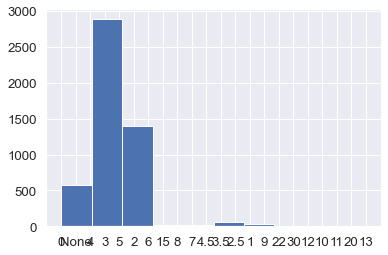

In [18]:
#check the garage column
plt.hist(bdata1.garage,bins=10)

(array([1.606e+03, 3.288e+03, 8.800e+01, 1.000e+01, 4.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <a list of 10 Patch objects>)

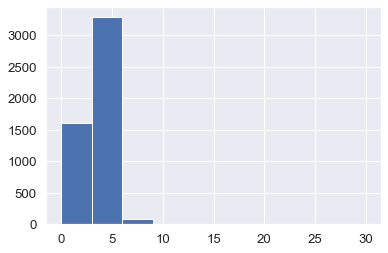

In [19]:
# Garage: replace null values to 0
# bdata["garage"].replace("None", 0, inplace=True)
plt.hist(bdata["garage"].to_numpy(dtype=float),bins=10)

/Users/preethamvignesh/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/preethamvignesh/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/preethamvignesh/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:

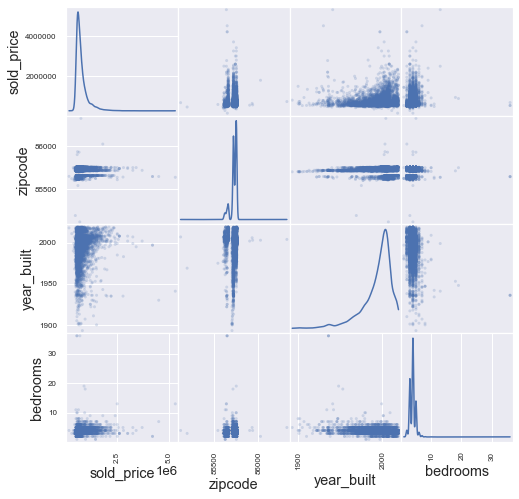

In [20]:
bdatt = bdata[['sold_price', 'zipcode','year_built','bedrooms','sqrt_ft','garage','fireplaces']].copy()

from pandas.plotting import scatter_matrix
# scatter_matrix(bdatt)
scatter_matrix(bdatt,figsize=(8,8),alpha=0.2,diagonal='kde')
# scatter_matrix(new,alpha=0.2,marker='+')  
plt.show()